In [5]:
# Importing the libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [6]:
# Let us now go ahead and read the dataset and check the frist 5 rows of the dataset

company = pd.read_csv('Company data.csv')
company.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17
2,3,92.2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,...,5.07,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76
3,4,2.7,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN
4,5,109.0,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,...,9.46,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN


In [7]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541 entries, 0 to 3540
Data columns (total 52 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          3541 non-null   int64  
 1   Networth Next Year                           3541 non-null   float64
 2   Total assets                                 3541 non-null   float64
 3   Net worth                                    3541 non-null   float64
 4   Total income                                 3343 non-null   float64
 5   Change in stock                              3083 non-null   float64
 6   Total expenses                               3402 non-null   float64
 7   Profit after tax                             3410 non-null   float64
 8   PBDITA                                       3410 non-null   float64
 9   PBT                                          3410 non-null   float64
 10  

In [8]:
# Fixing messy column names (containing spaces) for ease of use

company.columns = company.columns.str.replace(' ','_').str.replace('(','').str.replace(')','').str.replace('%','perc').str.replace('/','_to_')

In [9]:
company.columns

Index(['Num', 'Networth_Next_Year', 'Total_assets', 'Net_worth',
       'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax',
       'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_perc_of_total_income',
       'PBT_as_perc_of_total_income', 'PAT_as_perc_of_total_income',
       'Cash_profit_as_perc_of_total_income', 'PAT_as_perc_of_net_worth',
       'Sales', 'Income_from_financial_services', 'Other_income',
       'Total_capital', 'Reserves_and_funds',
       'Deposits_accepted_by_commercial_banks', 'Borrowings',
       'Current_liabilities_&_provisions', 'Deferred_tax_liability',
       'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed',
       'TOL_to_TNW', 'Total_term_liabilities__to__tangible_net_worth',
       'Contingent_liabilities__to__Net_worth_perc', 'Contingent_liabilities',
       'Net_fixed_assets', 'Investments', 'Current_assets',
       'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times',
       'Debt_to_equity_ratio_tim

In [10]:
print("The num of rows (observation) is", company.shape[0], '\n', 'The num of columns (variables) is', company.shape[1])

The num of rows (observation) is 3541 
 The num of columns (variables) is 52


In [11]:
company.shape

(3541, 52)

In [12]:
# Now, let us check the basis measures of descriptive statistics for the continuous variable
company.describe()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
count,3541.000000,3541.000000,3.541000e+03,3541.000000,3.343000e+03,3083.000000,3.402000e+03,3410.00000,3410.000000,3410.000000,...,3213.000000,2801.000000,2901.000000,3180.000000,2.849000e+03,2849.000000,3541.000000,3541.000000,3.541000e+03,1347.000000
mean,1772.451567,1616.256199,3.443382e+03,1295.862214,4.582823e+03,41.489264,4.262931e+03,277.36044,578.056305,383.810088,...,17.041261,87.078725,27.930469,19.088399,2.206739e+07,-1333.698175,-220.316436,-221.512285,3.443382e+03,63.905687
std,1023.731393,17459.639673,3.097089e+04,13387.891867,5.568124e+04,440.573761,5.302869e+04,3064.40606,5653.770427,4117.069953,...,83.943754,598.545835,151.042868,376.340737,1.655193e+08,37500.729972,14261.946209,14261.923760,3.097089e+04,1433.809532
min,1.000000,-74265.600000,1.000000e-01,0.000000,0.000000e+00,-3029.400000,-1.000000e-01,-3908.30000,-440.700000,-3894.800000,...,0.000000,-0.090000,-0.180000,-2.000000,-2.147484e+09,-999998.900000,-843181.820000,-843181.820000,1.000000e-01,-1116.640000
25%,886.000000,31.700000,9.130000e+01,31.300000,1.064500e+02,-1.800000,9.582500e+01,0.50000,6.900000,0.700000,...,3.760000,8.200000,5.100000,2.990000,1.316250e+06,10.000000,0.000000,0.000000,9.130000e+01,3.275000
50%,1773.000000,116.300000,3.097000e+02,102.300000,4.449000e+02,1.600000,4.077000e+02,8.80000,35.400000,12.400000,...,6.320000,17.270000,9.760000,6.400000,4.672063e+06,10.000000,1.430000,1.180000,3.097000e+02,9.100000
75%,2658.000000,456.100000,1.098700e+03,377.300000,1.440900e+03,18.050000,1.359775e+03,52.27500,150.250000,71.975000,...,11.680000,40.350000,20.240000,11.845000,1.065197e+07,10.000000,9.620000,7.480000,1.098700e+03,17.790000
max,3545.000000,805773.400000,1.176509e+06,613151.600000,2.442828e+06,14185.500000,2.366035e+06,119439.10000,208576.500000,145292.600000,...,3135.200000,17947.600000,5651.400000,21092.000000,4.130401e+09,100000.000000,34522.530000,34522.530000,1.176509e+06,51002.740000


In [13]:
# Creating a binary target variable using "Networth_Next_Year"

company['default'] = np.where((company['Networth_Next_Year']>0),1,0)

In [14]:
company.head()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE,default
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31,1
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17,1
2,3,92.2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,...,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76,1
3,4,2.7,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN,1
4,5,109.0,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,...,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN,1


In [15]:
company[['default','Networth_Next_Year']].head(20)

,default,Networth_Next_Year
0,1,8890.6
1,1,394.3
2,1,92.2
3,1,2.7
4,1,109.0
5,1,688.6
6,1,246.0
7,1,13.7
8,1,291.5
9,0,-7.3


In [16]:
company['default'].value_counts()

1    3298
0     243
Name: default, dtype: int64

In [17]:
company['default'].value_counts(normalize=True)

1    0.931375
0    0.068625
Name: default, dtype: float64

In [18]:
740/3541*100

20.898051397910194

In [19]:
company.isnull().sum()

Num                                                  0
Networth_Next_Year                                   0
Total_assets                                         0
Net_worth                                            0
Total_income                                       198
Change_in_stock                                    458
Total_expenses                                     139
Profit_after_tax                                   131
PBDITA                                             131
PBT                                                131
Cash_profit                                        131
PBDITA_as_perc_of_total_income                      68
PBT_as_perc_of_total_income                         68
PAT_as_perc_of_total_income                         68
Cash_profit_as_perc_of_total_income                 68
PAT_as_perc_of_net_worth                             0
Sales                                              259
Income_from_financial_services                     935
Other_inco

In [20]:
company.shape

(3541, 53)

In [21]:
3541*53

187673

In [22]:
company.size

187673

In [23]:
company.isnull().sum().sum()

18533

In [24]:
company_x = company.drop('default', axis=1)
company_y = company['default']

In [25]:
company_x.head(2)

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17


In [26]:
company_x.duplicated().sum()

0

In [27]:
company_y.head(2)

0    1
1    1
Name: default, dtype: int32

In [28]:
# handling missing value - required
# encoding - not required
# outlier treatment - required
# feature scaling - required
# imbalance treatment - required

In [29]:
# Let's check the number of outliers per columns

Q1 = company_x.quantile(0.25)
Q3 = company_x.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

In [30]:
621/3541*100

17.537418808246258

In [31]:
((company_x > UL) | (company_x < LL)).sum()

Num                                                 0
Networth_Next_Year                                506
Total_assets                                      484
Net_worth                                         499
Total_income                                      427
Change_in_stock                                   621
Total_expenses                                    432
Profit_after_tax                                  577
PBDITA                                            483
PBT                                               576
Cash_profit                                       515
PBDITA_as_perc_of_total_income                    287
PBT_as_perc_of_total_income                       453
PAT_as_perc_of_total_income                       502
Cash_profit_as_perc_of_total_income               353
PAT_as_perc_of_net_worth                          344
Sales                                             418
Income_from_financial_services                    432
Other_income                

In [32]:
company_x[((company_x > UL) | (company_x < LL))] = np.nan

In [33]:
company_x.isnull().sum()

Num                                                  0
Networth_Next_Year                                 506
Total_assets                                       484
Net_worth                                          499
Total_income                                       625
Change_in_stock                                   1079
Total_expenses                                     571
Profit_after_tax                                   708
PBDITA                                             614
PBT                                                707
Cash_profit                                        646
PBDITA_as_perc_of_total_income                     355
PBT_as_perc_of_total_income                        521
PAT_as_perc_of_total_income                        570
Cash_profit_as_perc_of_total_income                421
PAT_as_perc_of_net_worth                           344
Sales                                              677
Income_from_financial_services                    1367
Other_inco

In [34]:
((company_x > UL) | (company_x < LL)).sum()

Num                                               0
Networth_Next_Year                                0
Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Income_from_financial_services                    0
Other_income                                      0
Total_capita

In [35]:
company_x.isnull().sum().sum()

39981

In [36]:
company_x.isnull().sum()/len(company_x)*100

Num                                                 0.000000
Networth_Next_Year                                 14.289749
Total_assets                                       13.668455
Net_worth                                          14.092064
Total_income                                       17.650381
Change_in_stock                                    30.471618
Total_expenses                                     16.125388
Profit_after_tax                                   19.994352
PBDITA                                             17.339735
PBT                                                19.966111
Cash_profit                                        18.243434
PBDITA_as_perc_of_total_income                     10.025417
PBT_as_perc_of_total_income                        14.713358
PAT_as_perc_of_total_income                        16.097148
Cash_profit_as_perc_of_total_income                11.889297
PAT_as_perc_of_net_worth                            9.714770
Sales                   

In [37]:
company_x = company_x.drop(['Num','Networth_Next_Year'], axis=1)

In [38]:
company_x.shape

(3541, 50)

In [39]:
company_sub1 = pd.concat([company_x, company_y], axis=1)

In [40]:
company_sub1.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE,default
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.46,...,NaN,21.78,7.71,NaN,10.0,NaN,7.10,NaN,27.31,1
1,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,NaN,158.6,18.53,...,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17,1
2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,0.3,1.22,...,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76,1
3,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN,1
4,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,11.9,1.96,...,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN,1


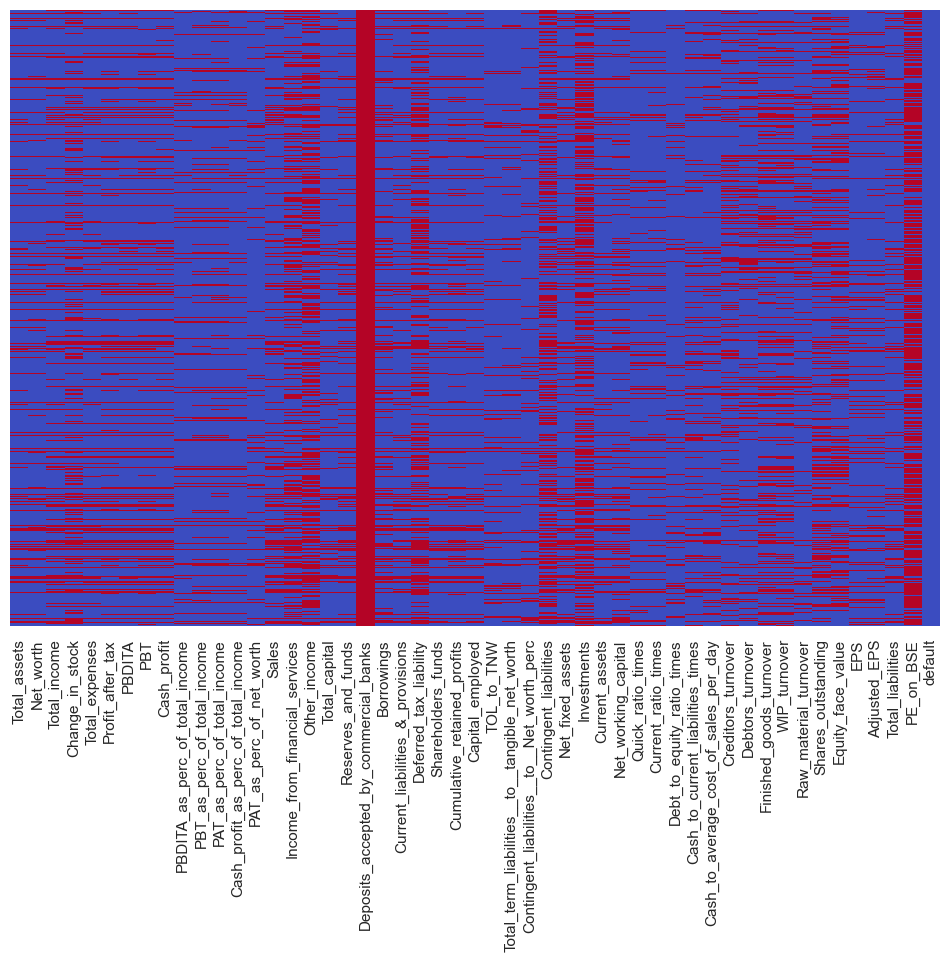

In [41]:
# Let's visually inspect the missing values in our data
plt.figure(figsize=(12,8))
sns.heatmap(company_sub1.isnull(), cbar=False, cmap='coolwarm', yticklabels=False)
plt.show()

In [42]:
# we should inspect total missing values by each row
company_sub1.isnull().sum(axis=1)

0       30
1        3
2        3
3       23
4        3
        ..
3536     5
3537     7
3538     2
3539     7
3540    22
Length: 3541, dtype: int64

In [43]:
company_sub1.shape

(3541, 51)

In [44]:
51*0.15

7.6499999999999995

In [45]:
company_sub1_temp = company_sub1[company_sub1.isnull().sum(axis=1) <=7]

In [46]:
3541 - 2396

1145

In [47]:
1145/3541*100

32.33549844676645

In [48]:
company_sub1_temp.shape

(1527, 51)

In [49]:
company_sub1_temp['default'].value_counts(normalize=True)

1    0.981009
0    0.018991
Name: default, dtype: float64

In [50]:
company_sub1.shape

(3541, 51)

In [51]:
company_sub1.isnull().sum().sort_values(ascending=False)/len(company_sub1)*100

Deposits_accepted_by_commercial_banks             100.000000
PE_on_BSE                                          67.636261
Investments                                        50.833098
Other_income                                       45.523863
Contingent_liabilities                             42.784524
Deferred_tax_liability                             41.541937
Income_from_financial_services                     38.604914
Equity_face_value                                  31.855408
Shares_outstanding                                 30.641062
Change_in_stock                                    30.471618
Finished_goods_turnover                            30.104490
WIP_turnover                                       26.998023
Borrowings                                         22.536007
Profit_after_tax                                   19.994352
PBT                                                19.966111
Net_working_capital                                19.881389
Creditors_turnover      

In [ ]:
"""
Income_from_financial_services                     38.604914 - ok
Equity_face_value                                  31.855408 - can i take this one
Shares_outstanding                                 30.641062 - can i take this one
Change_in_stock                                    30.471618 - can i take this one
Finished_goods_turnover                            30.104490 - can i take this one
WIP_turnover - can i take this one

"""

In [53]:
# Dropping columns with more than 25% missing value
company_sub2 = company_sub1.drop(['Deposits_accepted_by_commercial_banks','PE_on_BSE','Investments','Other_income',
                                 'Contingent_liabilities','Deferred_tax_liability',
                                  'Income_from_financial_services'], axis=1)

In [54]:
company_sub2.shape

(3541, 44)

In [55]:
# Segregate the predictors and response
predictors = company_sub2.drop('default', axis=1)
response = company_sub2['default']

In [64]:
response.value_counts(normalize=True)

1    0.931375
0    0.068625
Name: default, dtype: float64

In [56]:
predictors.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.46,...,3.62,3.85,NaN,21.78,7.71,NaN,10.0,NaN,7.10,NaN
1,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,NaN,158.6,18.53,...,9.80,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0
2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,0.3,1.22,...,5.28,5.07,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8
3,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,0.00,0.00,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7
4,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,11.9,1.96,...,13.00,9.46,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5


In [57]:
response

0       1
1       1
2       1
3       1
4       1
       ..
3536    1
3537    1
3538    1
3539    1
3540    0
Name: default, Length: 3541, dtype: int32

In [58]:
# Scale the predictors

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictor = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

In [59]:
company_sub3 = pd.concat([scaled_predictor, response], axis=1)

In [60]:
company_sub3.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,default
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.127839,...,-0.597170,NaN,1.143298,0.105724,NaN,0.0,NaN,1.046657,NaN,1
1,0.857364,1.040021,1.169560,2.929613,1.187136,3.369301,2.796202,NaN,2.463083,1.046692,...,-0.232877,-0.366744,-0.417817,0.744868,1.222365,0.0,1.165458,1.675933,0.857364,1
2,-0.409188,-0.276449,-0.203697,-0.739865,-0.161047,-0.765968,-0.644752,-0.716398,-0.639534,-1.203003,...,-0.356933,-0.625116,-1.210937,NaN,0.574110,0.0,-0.607066,-0.619719,-0.409188,1
3,-0.820702,-0.790130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.361560,...,-1.355293,NaN,NaN,-1.208357,-0.969217,0.0,-0.522419,-0.510089,-0.820702,1
4,0.030224,-0.239720,1.239001,-1.643828,1.329523,-0.355157,-0.331938,-0.394099,-0.412179,-1.106829,...,0.507524,-0.446283,-0.373026,1.694209,-0.861096,0.0,0.816709,1.224258,0.030224,1


# Imputing the remaining missing value

In [61]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=11)
company_imputed = pd.DataFrame(imputer.fit_transform(company_sub3), columns=company_sub3.columns)

In [62]:
company_imputed.isnull().sum()

Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Total_capital                                     0
Reserves_and_funds                                0
Borrowings                                        0
Current_liabilities_&_provisions                  0
Shareholders

In [63]:
company_imputed.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
3536    0
3537    0
3538    0
3539    0
3540    0
Length: 3541, dtype: int64

In [70]:
company_imputed.shape

(3541, 44)

In [72]:
company_imputed.columns

Index(['Total_assets', 'Net_worth', 'Total_income', 'Change_in_stock',
       'Total_expenses', 'Profit_after_tax', 'PBDITA', 'PBT', 'Cash_profit',
       'PBDITA_as_perc_of_total_income', 'PBT_as_perc_of_total_income',
       'PAT_as_perc_of_total_income', 'Cash_profit_as_perc_of_total_income',
       'PAT_as_perc_of_net_worth', 'Sales', 'Total_capital',
       'Reserves_and_funds', 'Borrowings', 'Current_liabilities_&_provisions',
       'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed',
       'TOL_to_TNW', 'Total_term_liabilities__to__tangible_net_worth',
       'Contingent_liabilities__to__Net_worth_perc', 'Net_fixed_assets',
       'Current_assets', 'Net_working_capital', 'Quick_ratio_times',
       'Current_ratio_times', 'Debt_to_equity_ratio_times',
       'Cash_to_current_liabilities_times',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turnover', 'Finished_goods_turnover', 'WIP_turnover',
       'Raw_material_turno

# EDA Part

#### inspect possible correlation between independent variables

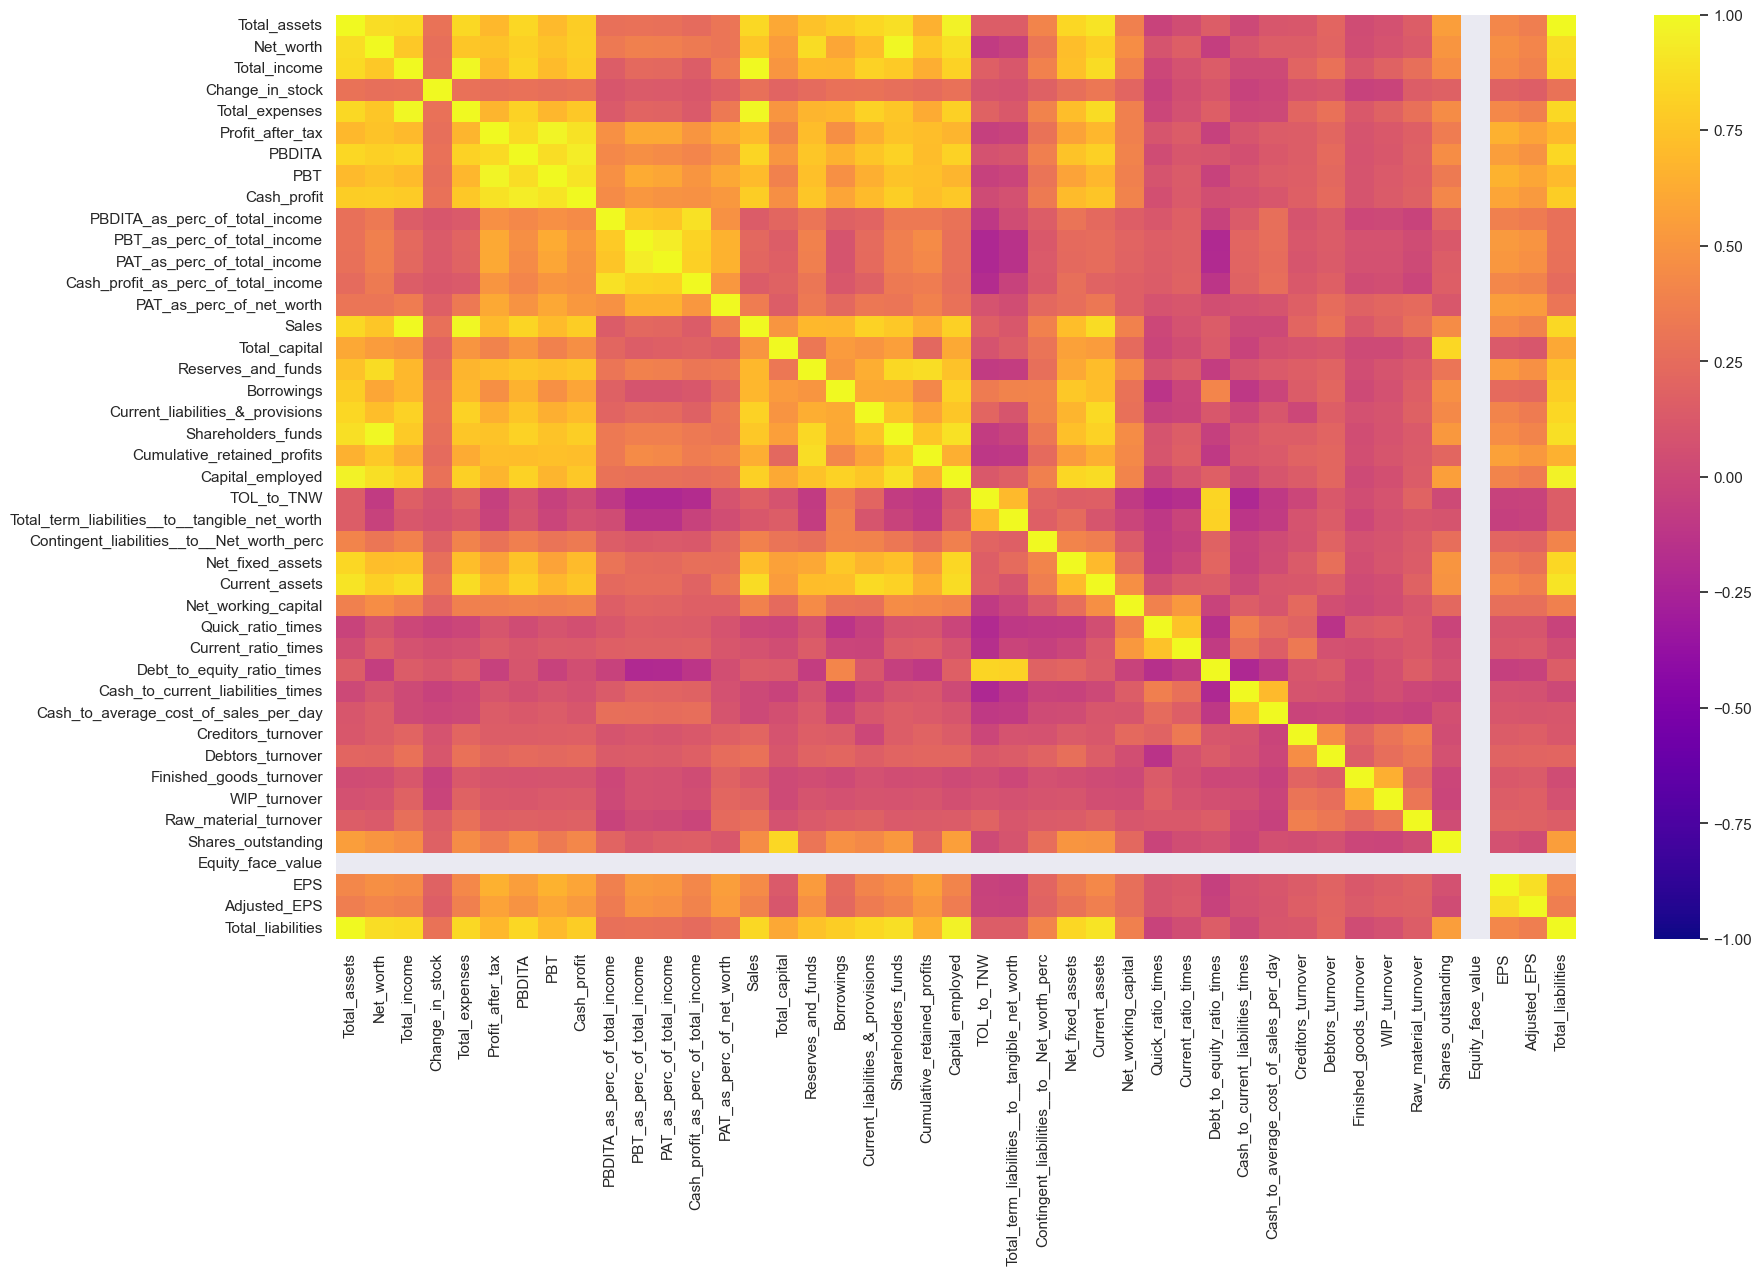

In [69]:
plt.figure(figsize=(20,12))
cor_matrix = company_imputed.drop('default', axis=1).corr()
sns.heatmap(cor_matrix, cmap='plasma',vmin=-1, vmax=1)
plt.show()

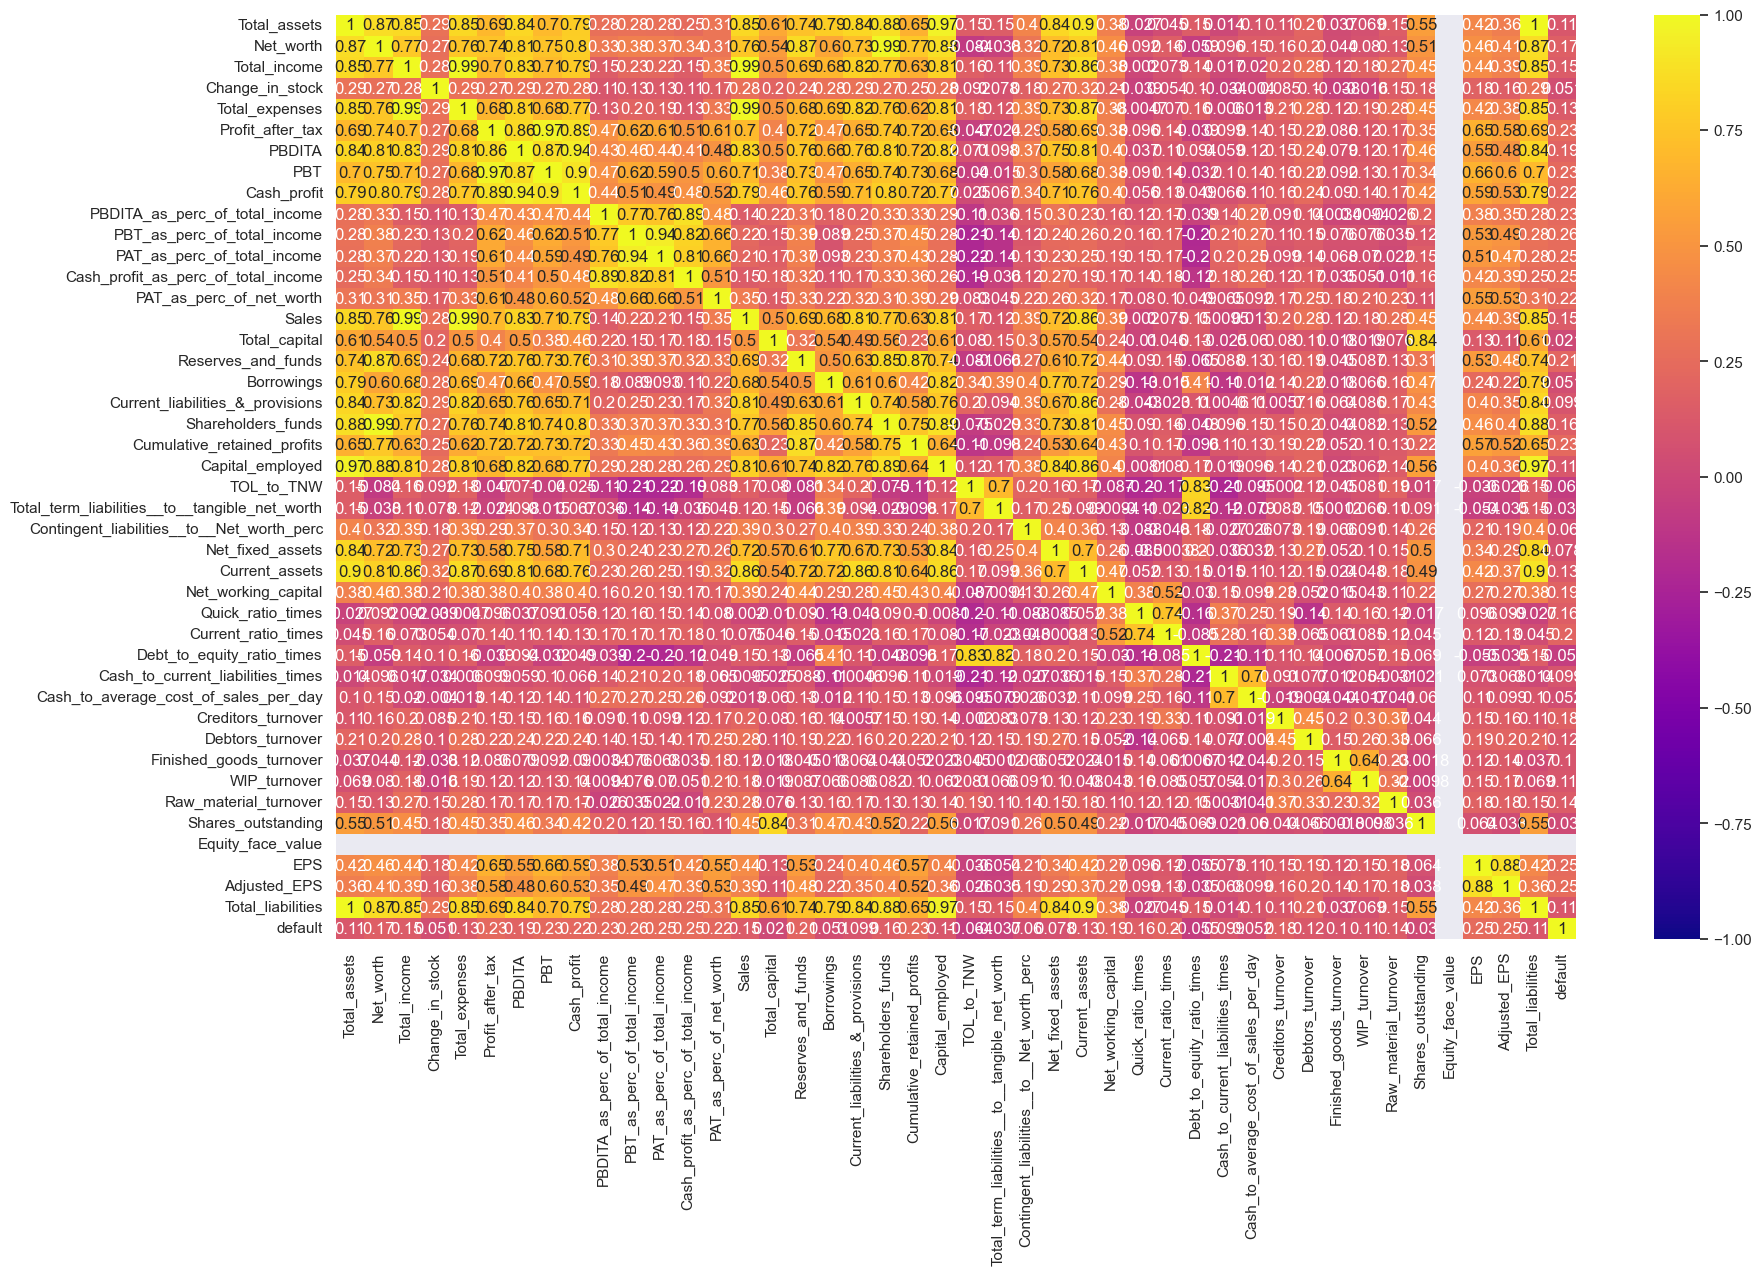

In [68]:
plt.figure(figsize=(20,12))
#cor_matrix = company_imputed(axis=1).corr()
sns.heatmap(company_imputed.corr(), annot=True,cmap='plasma',vmin=-1, vmax=1)
plt.show()

In [73]:
predictors = company_imputed.drop('default', axis=1)
response = company_imputed['default']

In [76]:
predictors.shape

(3541, 43)

In [77]:
43/3

14.333333333333334

In [74]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [71]:
from sklearn.feature_selection import RFE

In [75]:
x_train, x_test, y_train, y_test = train_test_split(predictors, response, test_size=0.25,
                                                   random_state=2, stratify=response)

In [ ]:
### For modeling we will use LogisticRegression with RFE (recursive feature elimination)

In [111]:
LogR = LogisticRegression()
#LogR.fir(x_train, y_train)

In [112]:
selector = RFE(estimator=LogR, n_features_to_select=15, step=1)

In [113]:
selector = selector.fit(x_train, y_train)

In [114]:
selector.n_features_

15

In [115]:
selector.ranking_

array([22, 28, 24,  1,  1, 13,  7, 12,  1,  1, 19,  1,  1, 18,  1,  2,  1,
        1, 10,  1,  1, 23, 20,  6, 26,  8,  9,  4, 21,  1,  5, 17, 27,  3,
       25,  1, 14, 11,  1, 29,  1, 15, 16])

In [106]:
df = pd.DataFrame({'feature': scaled_predictor.columns, 'Rank':selector.ranking_})
df[df['Rank'] ==1]

,feature,Rank
3,Change_in_stock,1
4,Total_expenses,1
6,PBDITA,1
8,Cash_profit,1
9,PBDITA_as_perc_of_total_income,1
11,PAT_as_perc_of_total_income,1
12,Cash_profit_as_perc_of_total_income,1
14,Sales,1
15,Total_capital,1
16,Reserves_and_funds,1


<AxesSubplot:>

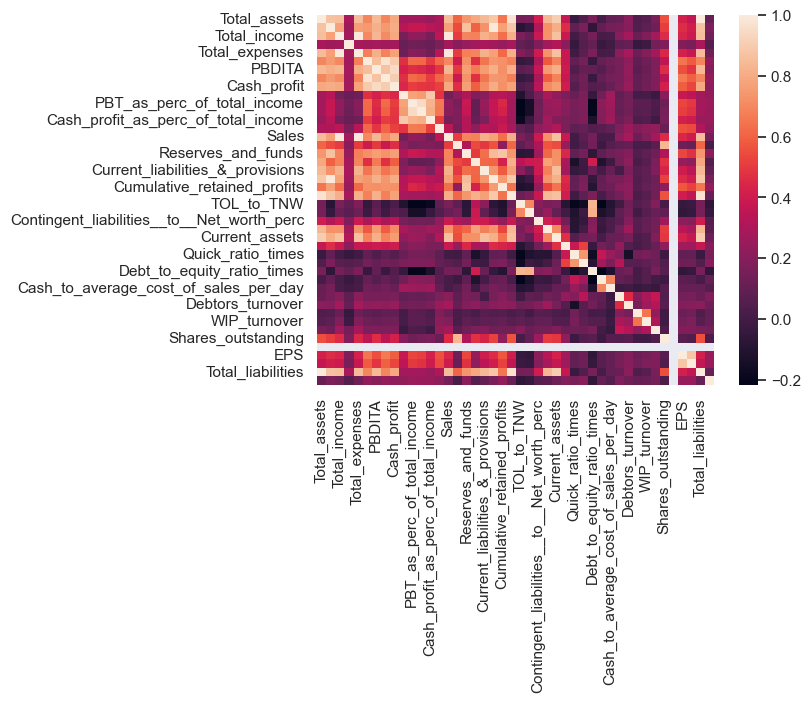

In [84]:
# correlation analysis
sns.heatmap(company_imputed.corr())

In [85]:
df1 = company_imputed.corr()['default'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature', 
                                                                                         'default':'corr_coeff'})
df1

,feature,corr_coeff
0,Net_worth,0.169561
1,Total_income,0.145223
2,Change_in_stock,0.051385
3,Total_expenses,0.133699
4,Profit_after_tax,0.229768
5,PBDITA,0.194840
6,PBT,0.231695
7,Cash_profit,0.222586
8,PBDITA_as_perc_of_total_income,0.233833
9,PBT_as_perc_of_total_income,0.255335


# Validating the model on train and test set

In [86]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [107]:
pred_train = selector.predict(x_train)
pred_test = selector.predict(x_test)

In [108]:
print(confusion_matrix(y_train, pred_train))
print("**************"*10)
print(confusion_matrix(y_test, pred_test))

[[  47  135]
 [  19 2454]]
********************************************************************************************************************************************
[[ 12  49]
 [  9 816]]


In [109]:
print("Training Accuracy", accuracy_score(y_train, pred_train))
print("**************"*10)
print("Test Accuracy", accuracy_score(y_test, pred_test))

Training Accuracy 0.9419962335216573
********************************************************************************************************************************************
Test Accuracy 0.9345372460496614


In [110]:
print(classification_report(y_train, pred_train))
print("**************"*10)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.71      0.26      0.38       182
         1.0       0.95      0.99      0.97      2473

    accuracy                           0.94      2655
   macro avg       0.83      0.63      0.67      2655
weighted avg       0.93      0.94      0.93      2655

********************************************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.57      0.20      0.29        61
         1.0       0.94      0.99      0.97       825

    accuracy                           0.93       886
   macro avg       0.76      0.59      0.63       886
weighted avg       0.92      0.93      0.92       886



In [91]:
response.value_counts(normalize=True)

1.0    0.931375
0.0    0.068625
Name: default, dtype: float64

# We see poor recall score for both train and test
## Since, only 7% of the total data had defaults (-1), we will now try to balance the data before fitting the model

In [93]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33)
x_sm, y_sm = sm.fit_resample(x_train, y_train)

In [94]:
y_train.value_counts(normalize=True)

1.0    0.93145
0.0    0.06855
Name: default, dtype: float64

In [95]:
y_sm.value_counts(normalize=True)

1.0    0.5
0.0    0.5
Name: default, dtype: float64

In [96]:
selector_smoter = selector.fit(x_sm, y_sm)

In [97]:
selector_smoter.n_features_

15

In [98]:
pred_train_smote = selector_smoter.predict(x_sm)
pred_test_smote = selector_smoter.predict(x_test)

In [100]:
print("Training Accuracy", accuracy_score(y_sm, pred_train_smote))
print("**************"*10)
print("Test Accuracy", accuracy_score(y_test, pred_test_smote))

Training Accuracy 0.8679741205014153
********************************************************************************************************************************************
Test Accuracy 0.8126410835214447


In [101]:
print(classification_report(y_sm, pred_train_smote))
print("**************"*10)
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88      2473
         1.0       0.92      0.81      0.86      2473

    accuracy                           0.87      4946
   macro avg       0.87      0.87      0.87      4946
weighted avg       0.87      0.87      0.87      4946

********************************************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.24      0.82      0.38        61
         1.0       0.98      0.81      0.89       825

    accuracy                           0.81       886
   macro avg       0.61      0.82      0.63       886
weighted avg       0.93      0.81      0.85       886



# RandomForest Classifier Model

In [117]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()

In [118]:
select_rf = RFE(estimator=rforest, n_features_to_select=15, step=1)

In [119]:
select_rf = select_rf.fit(x_sm, y_sm)

In [120]:
pred_train_rf_smote = select_rf.predict(x_sm)
pred_test_rf_smote = select_rf.predict(x_test)

In [121]:
print("Training Accuracy", accuracy_score(y_sm, pred_train_rf_smote))
print("**************"*10)
print("Test Accuracy", accuracy_score(y_test, pred_test_rf_smote))

Training Accuracy 1.0
********************************************************************************************************************************************
Test Accuracy 0.9243792325056434


In [127]:
# using cross validation approach
from sklearn.model_selection import cross_val_score
training = cross_val_score(select_rf, x_train, y_train, cv=10)
print("All 10 accuracy", training)
print("Avg Training Acc", training.mean())
print("Max Training Acc", training.max())

All 10 accuracy [0.94736842 0.95864662 0.95112782 0.94736842 0.95112782 0.94716981
 0.96603774 0.94339623 0.94716981 0.96226415]
Avg Training Acc 0.9521676833593418
Max Training Acc 0.9660377358490566


In [122]:
print(classification_report(y_sm, pred_train_rf_smote))
print("**************"*10)
print(classification_report(y_test, pred_test_rf_smote))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2473
         1.0       1.00      1.00      1.00      2473

    accuracy                           1.00      4946
   macro avg       1.00      1.00      1.00      4946
weighted avg       1.00      1.00      1.00      4946

********************************************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.46      0.64      0.54        61
         1.0       0.97      0.95      0.96       825

    accuracy                           0.92       886
   macro avg       0.72      0.79      0.75       886
weighted avg       0.94      0.92      0.93       886



In [123]:
# without smote
select_rf = select_rf.fit(x_train, y_train)

In [124]:
pred_train_rf = select_rf.predict(x_train)
pred_test_rf = select_rf.predict(x_test)

In [125]:
print("Training Accuracy", accuracy_score(y_train, pred_train_rf))
print("**************"*10)
print("Test Accuracy", accuracy_score(y_test, pred_test_rf))

Training Accuracy 1.0
********************************************************************************************************************************************
Test Accuracy 0.9446952595936795


In [126]:
print(classification_report(y_train, pred_train_rf))
print("**************"*10)
print(classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       182
         1.0       1.00      1.00      1.00      2473

    accuracy                           1.00      2655
   macro avg       1.00      1.00      1.00      2655
weighted avg       1.00      1.00      1.00      2655

********************************************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.69      0.36      0.47        61
         1.0       0.95      0.99      0.97       825

    accuracy                           0.94       886
   macro avg       0.82      0.67      0.72       886
weighted avg       0.94      0.94      0.94       886

